# Assignment 3 - basic classifiers

Math practice and coding application for main classifiers introduced in Chapter 3 of the Python machine learning book. 

## Weighting

Note that this assignment is more difficult than the previous ones, and thus has a higher weighting 3 and longer duration (3 weeks). Each one of the previous two assignments has a weighting 1.

Specifically, the first 3 assignments contribute to your continuous assessment as follows:

Assignment weights: $w_1 = 1, w_2 = 1, w_3 = 3$

Assignment grades: $g_1, g_2, g_3$

Weighted average: $\frac{1}{\sum_i w_i} \times \sum_i \left(w_i \times g_i \right)$

Future assignments will be added analogously.

# RBF kernel (20 points)

Show that a Gaussian RBF kernel can be expressed as a dot product:
$$
K(\mathbf{x}, \mathbf{y}) 
= e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} 
= \phi(\mathbf{x})^T \phi(\mathbf{y})
$$
by spelling out the mapping function $\phi$.

For simplicity
* you can assume both $\mathbf{x}$ and $\mathbf{y}$ are 2D vectors
$
x =
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
, \;
y =
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$
* we use a scalar unit variance here

even though the proof can be extended for vectors $\mathbf{x}$ $\mathbf{y}$ and general covariance matrices.

Hint: use Taylor series expansion of the exponential function

# Kernel SVM complexity (10 points)

How would the complexity (or number of parameters) of a kernel SVM change with the amount of training data, and why?
Note that the answer may depend on the specific kernel used.
Consider specifically the following types of kernels $K(\mathbf{x}, \mathbf{y})$.
* linear:
$$
K\left(\mathbf{x}, \mathbf{y}\right) = \mathbf{x}^T \mathbf{y}
$$
* polynomial with degree $q$:
$$
K\left(\mathbf{x}, \mathbf{y}\right) =
(\mathbf{x}^T\mathbf{y} + 1)^q
$$
* RBF with distance function $D$:
$$
K\left(\mathbf{x}, \mathbf{y} \right) = e^{-\frac{D\left(\mathbf{x}, \mathbf{y} \right)}{2s^2}}
$$


# Gaussian density Bayes (30 points)

$$
p\left(\Theta | \mathbf{X}\right)
= 
\frac{p\left(\mathbf{X} | \Theta\right) p\left(\Theta\right)}{p\left(\mathbf{X}\right)}
$$

Assume both the likelihood and prior have Gaussian distributions:

$$
\begin{align}
p(\mathbf{X} | \Theta)
&=
\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)
\\
p(\Theta)
&=
\frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
\end{align}
$$

Derive $\Theta$ from the dataset $\mathbf{X}$ via the following methods:

### ML (maximum likelihood) estimation 
$$
\Theta_{ML} = argmax_{\Theta} p(\mathbf{X} | \Theta)
$$

### MAP estimation
$$
\begin{align}
\Theta_{MAP} 
&= 
argmax_{\Theta} p(\Theta | \mathbf{X})
\\
&=
argmax_{\Theta} p(\mathbf{X} | \Theta) p(\Theta)
\end{align}
$$

### Bayes estimation

$$
\begin{align}
\Theta_{Bayes} 
&= 
E(\Theta | \mathbf{X})
\\
&= 
\int \Theta p(\Theta | \mathbf{X}) d\Theta
\end{align}
$$

# Hand-written digit classification (40 points)

In the textbook sample code we applied different scikit-learn classifers for the Iris data set.

In this exercise, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN
* naive Bayes

The dataset is available as part of scikit learn, as follows.

## Load data

In [260]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualize data

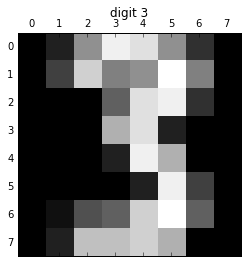

In [261]:
%matplotlib inline
import pylab as pl

index = 13
pl.gray()
pl.matshow(digits.images[index])
pl.title('digit ' + str(digits.target[index]))
pl.show()

## Date Preprocessing
Hint: How you divide training and test data set? And apply other techinques we have learned if needed.
You could take a look at the Iris data set case in the textbook.

In [262]:
#Your code comes here
from sklearn.cross_validation import train_test_split

# splitting data into 70% training and 30% test data: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_training = y_train.shape[0]
num_test = y_test.shape[0]
print('training: ' + str(num_training) + ', test: ' + str(num_test))

training: 1257, test: 540


In [263]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Classifier #1 Perceptron

In [264]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.5, random_state=0)
_ = ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

Misclassified samples: 39 out of 540


In [265]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


## Classifier #2 Logistic Regression

In [266]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

Misclassified samples: 35 out of 540


In [267]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.94


## Classifier #3 SVM

In [268]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

Misclassified samples: 8 out of 540


In [269]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.99


## Classifier #4 Decision Tree

In [270]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn import tree #DecisionTreeClassifier

t = tree.DecisionTreeClassifier(criterion='gini')
t.fit(X_train_std, y_train)
y_pred = t.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

Misclassified samples: 80 out of 540


In [271]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.85


## Classifer #5 Random Forest

In [272]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=90, 
                                random_state=1,
                                n_jobs=5)
forest.fit(X_train_std, y_train)
y_pred = forest.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

Misclassified samples: 11 out of 540


In [273]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


## Classifier #6 KNN

In [274]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

Misclassified samples: 16 out of 540


In [275]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.97


## Classifier #7 Naive Bayes

In [276]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
_ = gnb.fit(X_train_std, y_train)
y_pred = gnb.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

Misclassified samples: 125 out of 540


In [277]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.77
